In [1]:
using Turing, Distributions
using PyPlot, PyCall

In [2]:
y = [ 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0, 1.0, 1.0 ];
N = length(y);
K = 3;

In [3]:
@model BayesHmm(y) = begin
    s = tzeros(Int64, N)
    m = tzeros(Dual, K)
    T = Array{Array}(K)
    for i = 1:K
        T[i] ~ Dirichlet(ones(K)/K)
        # m[i] ~ Normal(1, 0.1) # Defining m this way causes label-switching problem.
        m[i] ~ Normal(i, 0.01)
    end
    s[1] ~ Categorical(ones(Float64, K)/K)
    for i = 2:N
        s[i] ~ Categorical(vec(T[s[i-1]]))
        y[i] ~ Normal(m[s[i]], 0.01)
    end
    return(s, m)
end

[Turing]: Assume - `T` is a parameter
[Turing]: Assume - `m` is a parameter
[Turing]: Assume - `s` is a parameter
[Turing]: Observe - `y` is an observation


BayesHmm (generic function with 4 methods)

In [4]:
g = Gibbs(300, HMC(1, 0.2, 5, :m, :T), PG(50, 1, :s))
s = @sample(BayesHmm(y), g);

[Gibbs]: Finshed within 40.386404037475586 seconds


In [5]:
describe(s)

Iterations = 1:300
Thinning interval = 1
Chains = 1
Samples per chain = 300

Empirical Posterior Estimates:
            Mean                  SD                        Naive SE               MCSE         ESS   
   m[1] 1.9988506452 0.0000000000000020017404633 0.000000000000000115570539532 0.0000000000 300.000000
   m[2] 3.0113520917 0.0000000000000022241560703 0.000000000000000128411710591 0.0000000000 300.000000
   m[3] 1.0039248030 0.0000000000000004448312141 0.000000000000000025682342118 0.0000000000 300.000000
T[1][1] 0.2898826716 0.0000000000000002224156070 0.000000000000000012841171059 0.0000000000 300.000000
T[1][2] 0.1096217313 0.0000000000000000417029263 0.000000000000000002407719574 0.0000000000 300.000000
T[1][3] 0.6004955971 0.0000000000000006672468211 0.000000000000000038523513177 0.0000000000 300.000000
T[2][1] 0.0231126779 0.0000000000000000139009754 0.000000000000000000802573191 0.0000000000 300.000000
T[2][2] 0.0975400186 0.0000000000000000556039018 0.00000000000000000

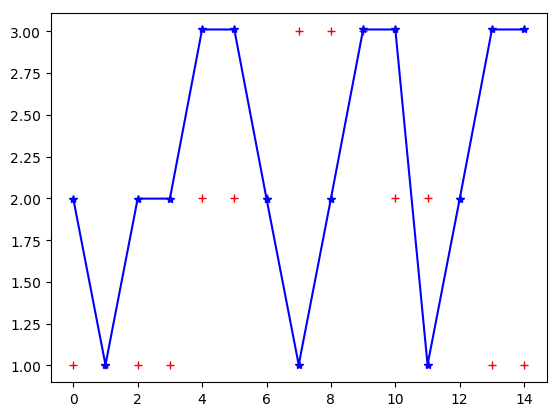

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x3173ff210>

In [6]:
m = c[:m][111];
s = c[:s][111];
PyPlot.plot(y, linestyle="None", marker="+", color = "r")
PyPlot.plot(m[s], linestyle="-", marker="*", color = "b")